**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [Lab14-TH](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab14/Lab14-TH.ipynb)

___

# <font color=green>Exercise 14: Data Models and Plotting </font>

**Medrano, Giovanni**

**R11521018**

ENGR 1330 ES-14 - Homework


## Exercise 0: Profile your computer

In [34]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

DESKTOP-6HAS1BN
desktop-6has1bn\medra
C:\Users\medra\anaconda3\python.exe
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


## Exercise 1: Data Modeling by Trial-and-Error

### Background
Most drugs have therapeutic benefits when the drug is above a “therapeutic threshold” but toxic side effects above a “toxic threshold”. Dosing protocols are intended to maintain the level of the drug in the patient’s blood within a “therapeutic window” that between these two thresholds. Using mathematical models helps an engineer optimize the drug design so the entire delivery process is as efficient as possible and localized drug concentrations are kept within a therapeutic window.  Here you will test some mathematical models for just one part of this process - an in vitro experiment of drug release from a nanoparticle. (“Nanosystems for Simultaneous Imaging and Drug Delivery to T Cells”, by Fahmy et al, AAPS Journal, 2007 vol 9.). The experimental results are listed below


|Time(Days) | $\mu$-grams released|
|---|---|
|0 |2.5|
|0.25|3.6|
|0.5|5.3|
|1|9.5|
|2|14.0|
|3|16.5|
|4|18.8|
|5|21.5|
|6|23.2|
|8|26.8|
|10|28.4|

1. Plot the drug release data with time on the horizontal axis, and mass released on the vertical axis. Use red circles as the marker.  

2. Create and plot a linear data model using a blue curve for the model. $\mu g_{release} = \beta_0 + \beta_1 \cdot t_{days}$ 

3. Create a list of prediction error; produce a histogram of these errors (called residuals).

4. Compute the sum of the squares of all of the residuals. 

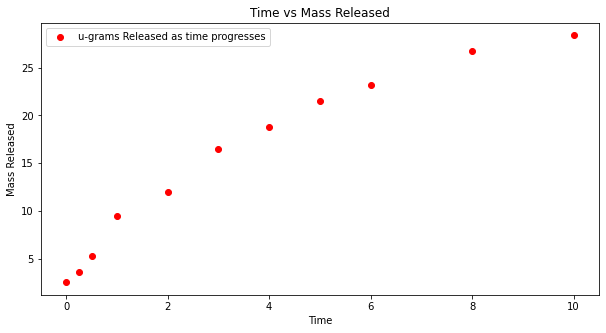

In [10]:
# code here
import matplotlib.pyplot as plt
time = [0, .25, .5, 1, 2, 3, 4, 5, 6, 8, 10]
u = [2.5, 3.6, 5.3, 9.5, 12, 16.5, 18.8, 21.5, 23.2, 26.8, 28.4]
# plotting function
def make2plot(listx1,listy1,xlable, ylable,title):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='o',linewidth=0) # basic data plot
    plt.xlabel(xlable)
    plt.ylabel(ylable)
    plt.legend(['u-grams Released as time progresses','Model'])# modify for argument insertion
    plt.title(title)
    plt.show()
    return
make2plot(time, u,'Time','Mass Released','Time vs Mass Released')

# sum_of_squares

Enter b0 value .05
Enter b1 value 1


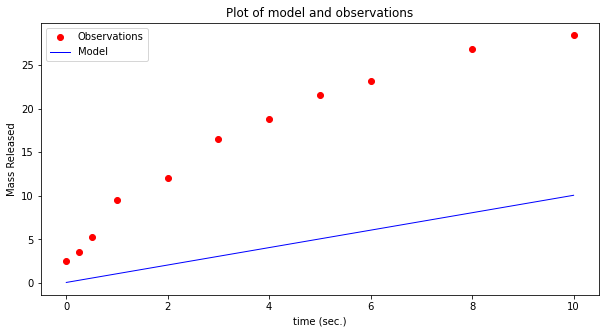

In [16]:
# linear model function
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='o',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Observations','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.show()
    return

def linear(b0,b1,x):
    linear=b0+b1*x 
    return(linear)
xtable = [0, .25, .5, 1, 2, 3, 4, 5, 6, 8, 10]
ytable = [2.5, 3.6, 5.3, 9.5, 12, 16.5, 18.8, 21.5, 23.2, 26.8, 28.4]

intercept=float(input('Enter b0 value'))
slope=float(input('Enter b1 value'))
# build a data model
modelYYY = [] # empty list
for i in range(len(xtable)):
    modelYYY.append(linear(intercept,slope,xtable[i]))
# Plotting results
make2plot(xtable,ytable,xtable,modelYYY,'time (sec.)','Mass Released','Plot of model and observations')

127.79999999999998
---------------
6.002500000000001
10.890000000000002
22.5625
71.40249999999999
99.00249999999998
180.90249999999997
217.5625
270.60249999999996
294.12249999999995
351.5625
336.7224999999999
---------------
1861.3349999999996
[2.45, 3.3000000000000003, 4.75, 8.45, 9.95, 13.45, 14.75, 16.45, 17.15, 18.75, 18.349999999999998]


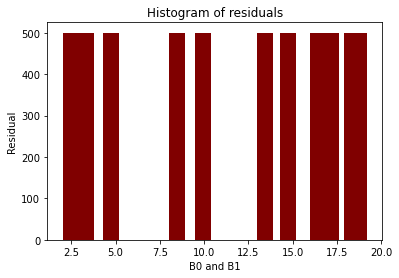

In [33]:
# supply data
def residue(list1,list2,list3):
    if len(list1)!=len(list2) or len(list1)!=len(list3):
        print('Lists unequal length, undefined operations')
        return
    for i in range(len(list1)):
        list3[i]=list1[i]-list2[i]
    return(list3)

resids = [0 for i in range(len(xtable))] # empty list
residue(ytable,modelYYY,resids)
obs = []
print(sum(resids))
print("---------------")
for i in range(len(resids)):
    obs.append(resids[i])
    resids[i]=resids[i]**2
    print(resids[i])
print("---------------")
print(sum(resids))
print('================')
# build lists of observation
# build lists of model
# plot
# creating the bar plot 
print(obs)
plt.bar(obs,500, color ='maroon',  
        width = .9) 
  
plt.xlabel("B0 and B1") 
plt.ylabel('Residual') 
plt.title("Histogram of residuals") 
plt.show() 
# prediction residuals

In [36]:
# sum of squares
import numpy as np
print(obs)
a = np.array(obs)
np.sum(a**2)

[2.45, 3.3000000000000003, 4.75, 8.45, 9.95, 13.45, 14.75, 16.45, 17.15, 18.75, 18.349999999999998]


1861.3349999999996

## Exercise-2: Examine a different model

Using the drug release data, repeat your analysis using a 2-nd order polynomial data model 

$\mu g_{release} = \beta_0 + \beta_1 \cdot t_{days} + \beta_2 \cdot t_{days}^2 $ 

1. Perform your trial-and-error fit for this model. Report the sum of square of residuals of your fitted data model.


Enter b0 value 0
Enter b1 value 1.75
Enter b2 value .2


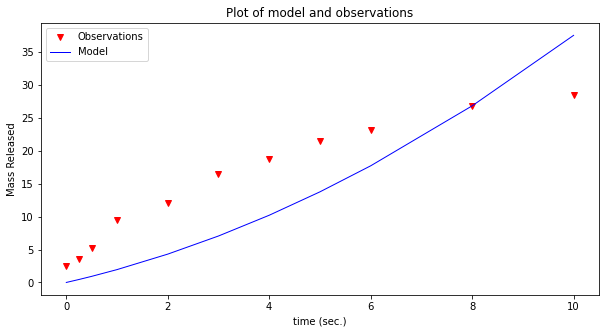

In [46]:
# code here
# quadratic model function
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='v',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Observations','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.show()
    return

def quadratic(b0,b1,b2,x):

    quadratic=b0+b1*x+b2*x**2
    return(quadratic)  

# Fit a data model - quadratic model
intercept=float(input('Enter b0 value'))
slope=float(input('Enter b1 value'))
curvature = float(input('Enter b2 value'))
# build a data model
modelYYY = [] # empty list
for i in range(len(xtable)):
    modelYYY.append(quadratic(intercept,slope,curvature,xtable[i]))
# Plotting results
make2plot(xtable,ytable,xtable,modelYYY,'time (sec.)','Mass Released','Plot of model and observations')




In [48]:
# get the residues
obs = []
resids = [0 for i in range(len(xtable))] # empty list
residue(ytable,modelYYY,resids)
print(sum(resids))
for i in range(len(resids)):
    obs.append(resids[i])

    resids[i]=resids[i]**2
print(sum(resids))
#print(obs)

47.474999999999994
487.990625
[2.5, 3.15, 4.375, 7.55, 7.7, 9.45, 8.600000000000001, 7.75, 5.5, 0.0, -9.100000000000001]


In [49]:
# sum_of_squares
import numpy as np
print(obs)
a = np.array(obs)
print('The sum of squares is below.')
np.sum(a**2)

[2.5, 3.15, 4.375, 7.55, 7.7, 9.45, 8.600000000000001, 7.75, 5.5, 0.0, -9.100000000000001]
The sum of squares is below.


487.990625

## Exercise-3: Examine a different model

Using the drug release data, repeat your analysis using a 3-rd order polynomial data model 

$\mu g_{release} = \beta_0 + \beta_1 \cdot t_{days} + \beta_2 \cdot t_{days}^2 + \beta_3 \cdot t_{days}^3$ 

1. Perform your trial-and-error fit. Report the sum of square of residuals of your fitted data model.

2. What is the order of the polynomial that gives the best fit in terms of the lowest sum of square of residuals? 

Enter b0 value 0
Enter b1 value 1.75
Enter b2 value .2
Enter b3 value .01


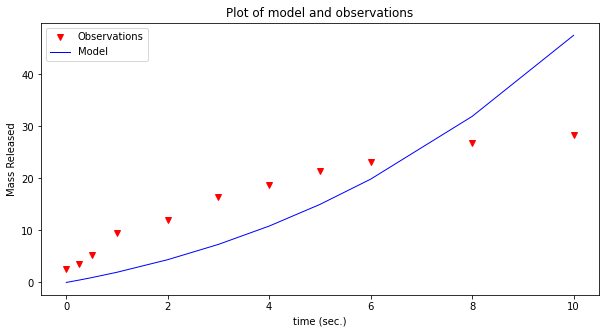

In [55]:
# code here
# quadratic model function
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='v',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Observations','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.show()
    return

def quadratic(b0,b1,b2,b3,x):

    quadratic=b0+b1*x+b2*x**2+b3*x**3
    return(quadratic)  

# Fit a data model - quadratic model
intercept=float(input('Enter b0 value'))
slope=float(input('Enter b1 value'))
curvature = float(input('Enter b2 value'))
b3 = float(input('Enter b3 value'))

# build a data model
modelYYY = [] # empty list
for i in range(len(xtable)):
    modelYYY.append(quadratic(intercept,slope,curvature,b3,xtable[i]))
# Plotting results
make2plot(xtable,ytable,xtable,modelYYY,'time (sec.)','Mass Released','Plot of model and observations')


# cubic model function
# build lists of model
# plot

In [58]:
# prediction residuals
# get the residues
obs = []
resids = [0 for i in range(len(xtable))] # empty list
residue(ytable,modelYYY,resids)
print(sum(resids))
for i in range(len(resids)):
    obs.append(resids[i])

    resids[i]=resids[i]**2
print(sum(resids))
#print(obs)

27.943593749999998
742.2812047119141


In [59]:
# sum_of_squares
import numpy as np
print(obs)
a = np.array(obs)
print('The sum of squares is below.')
np.sum(a**2)

[2.5, 3.14984375, 4.373749999999999, 7.54, 7.62, 9.18, 7.960000000000001, 6.5, 3.34, -5.120000000000001, -19.1]
The sum of squares is below.


742.2812047119141

## Exercise-4: Examine a different model

Using the drug release data, repeat your analysis using an exponential-decay type model 

$\mu g_{release} = \beta_0 (1- e^{-\beta_1 \cdot t_{days}}) $ 

1. Perform your trial-and-error fit for this model. Report the sum of square of residuals of your fitted data model.

In [ ]:
# code here
import math

def expDecay(b0, b1,x):
    x = (b0*(1-(math.e(-b1*x))))
    return(x)  
    
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='o',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Observations','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.show()
    return

xtable = [0, .25, .5, 1, 2, 3, 4, 5, 6, 8, 10]
ytable = [2.5, 3.6, 5.3, 9.5, 12, 16.5, 18.8, 21.5, 23.2, 26.8, 28.4]

intercept=float(input('Enter b0 value'))
slope=float(input('Enter b1 value'))
# build a data model
modelYYY = [] # empty list
for i in range(len(xtable)):
    modelYYY.append(expDecay(intercept,slope,xtable[i]))
# Plotting results
make2plot(xtable,ytable,xtable,modelYYY,'time (sec.)','Mass Released','Plot of model and observations')

# exponential decay model function
# build lists of model
# plot
# prediction residuals
# sum_of_squares

## Exercise-5: Decide

Which of the drug-release models do you like best?  Why?  The parameters in the exponential-decay model have bio-chemical conceptual meaning.  What is the significance of $\beta_0$ in this model? (Consider what happens as time gets large)

# I believe the exponential decat function is the best as it follows and models the data more accurately. The data appears to be increasing in an decaying matter.
# As time gets bigger the b0 the amount released begins to lower and lower due to the exponential decay model.

## Exercise-5: (continued) Use your model to predict behavior

Using your favorite data model predict the drug release for days 11-21 inclusive.  Compare your predictions to observations reported from the drug trials below:

|Time(Days) | $\mu$-grams released|
|---|---|
|12 |28.4|
|16 |28.5|
|21 |29.5|


Enter b0 value .05
Enter b1 value 1


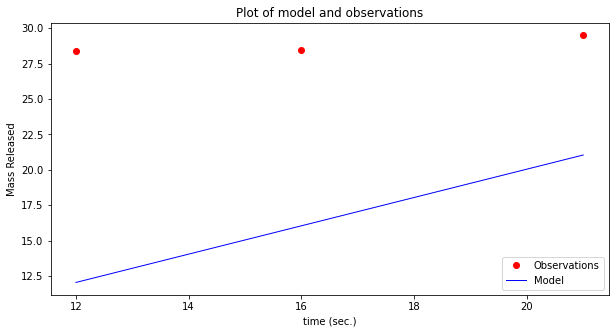

In [69]:
# code here
# add new data to observations
# use favorite model function with already determined parameters
# build lists of model
# plot
# linear model function
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='o',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Observations','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.show()
    return

def linear(b0,b1,x):
    linear=b0+b1*x 
    #print(linear)
    return(linear)
xtable = [12,16,21]
ytable = [28.4,28.5,29.5]

intercept=float(input('Enter b0 value'))
slope=float(input('Enter b1 value'))
# build a data model
modelYYY = [] # empty list
for i in range(len(xtable)):
    modelYYY.append(linear(intercept,slope,xtable[i]))
# Plotting results
make2plot(xtable,ytable,xtable,modelYYY,'time (sec.)','Mass Released','Plot of model and observations')
# compute prediction error 
# report error for 12,16,21 days values

37.25
---------------
267.32249999999993
155.00249999999997
71.40249999999999
---------------
493.7274999999999
[16.349999999999998, 12.45, 8.45]


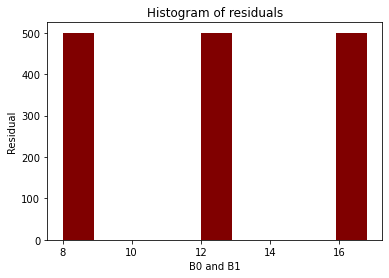

In [62]:
# supply data
def residue(list1,list2,list3):
    if len(list1)!=len(list2) or len(list1)!=len(list3):
        print('Lists unequal length, undefined operations')
        return
    for i in range(len(list1)):
        list3[i]=list1[i]-list2[i]
    return(list3)

resids = [0 for i in range(len(xtable))] # empty list
residue(ytable,modelYYY,resids)
obs = []
print(sum(resids))
print("---------------")
for i in range(len(resids)):
    obs.append(resids[i])
    resids[i]=resids[i]**2
    print(resids[i])
print("---------------")
print(sum(resids))
print('================')
# build lists of observation
# build lists of model
# plot
# creating the bar plot 
print(obs)
plt.bar(obs,500, color ='maroon',  
        width = .9) 
  
plt.xlabel("B0 and B1") 
plt.ylabel('Residual') 
plt.title("Histogram of residuals") 
plt.show() 
# prediction residuals

In [63]:
# sum of squares
import numpy as np
print(obs)
a = np.array(obs)
np.sum(a**2)

[16.349999999999998, 12.45, 8.45]


493.7274999999999

<!--## Exercise-6: Interpolating Polynomials

In a radiation-induced polymerization study, a gamma source was used to give measured doses of radiation. The dosage varied with position in the apparatus, with the following data being recorded:

|Position from emitter (inches)  | Dosage Rate, $10^5$ rads/hr  |
|:---  | :--- |
|0   |1.90|
|0.5 |2.39|
|1.0 |2.71|
|1.5 |2.98|
|2.0 |3.20|
|3.0 |3.20|
|3.5 |2.98|
|4.0 |2.74|

For some reason, the reading at 2.5 inches was not reported, but the value of radiation at that distance is needed; estimate the dosage level at 2.5 inches using a lagrange interpolation-type prediction engine.  Plot the interpolating function as well as the observations.-->